### Imports

Installation Of Captum

In [1]:
# %pip install captum

importing the desired libraries.

In [ ]:
# # Importing the desired libraries.
# import torch
# from torchvision import transforms
# import os
# from PIL import Image
# %cd .. 
# # Change to the project root directory
# from src.interpret.captum_visualizer import get_attributions, plot_attributions
# import warnings
# warnings.filterwarnings("ignore")

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\DELL\Documents\GitHub\ml-internship-projects\Project_1_Image_Classification_of_Animals_v2


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# def explain_prediction(model, input_tensor, target_class, original_image, save_path=None):
#     model.eval()
#     ig = IntegratedGradients(model)
#     attributions = ig.attribute(input_tensor, target=target_class, n_steps=200)

#     attr_np = attributions.squeeze().cpu().detach().numpy().transpose(1, 2, 0)
#     orig_np = original_image.squeeze().cpu().detach().numpy().transpose(1, 2, 0)

#     _ = viz.visualize_image_attr(
#         attr_np,
#         orig_np,
#         method="heat_map",
#         sign="positive",
#         show_colorbar=True,
#         title=f"Attribution for class {target_class}"
#     )

#     if save_path:
#         plt.savefig(save_path, dpi=300)
#         print(f"✅ Attribution saved to: {save_path}")

### Load model

In [ ]:
# os.getcwd()

'c:\\Users\\DELL\\Documents\\GitHub\\ml-internship-projects\\Project_1_Image_Classification_of_Animals_v2'

In [ ]:
# model = torch.load("models/resnet18_20250702_155546.pt")
# model.eval()


AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

### 🖼️ Image Preprocessing (match your training pipeline)

In [ ]:
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
# ])

In [ ]:







# # 🐾 Load a test image
# image_path = "../data/test/zebra/zebra1.jpg"
# original_image = Image.open(image_path).convert("RGB")
# input_tensor = transform(original_image).unsqueeze(0)

# # 🎓 Predict class
# with torch.no_grad():
#     output = model(input_tensor)
#     predicted_class = torch.argmax(output, dim=1).item()

# # 🔍 Generate attribution
# attributions = get_attributions(model, input_tensor, predicted_class)

# # 🧠 Visualize
# plot_attributions(
#     attributions=attributions,
#     original_image=input_tensor,
#     target_label=f"Class {predicted_class}",
#     save_path=f"../reports/explainability/zebra_explained.png"
# )

In [26]:
# 📦 Imports
import torch
from torchvision import transforms, models, datasets
from PIL import Image
import sys
import os
import matplotlib.pyplot as plt

# Adjust this path to point to your actual project root
project_root = os.path.abspath("..")  # assuming notebooks/ is inside project/
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.interpret.captum_visualizer import get_attributions, plot_attributions

In [ ]:
# test set is structured like: data/processed/test/<class_name>/*.jpg
dataset = datasets.ImageFolder("../data/processed/test")
idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}


In [ ]:
# 🎯 Reconstruct model & load weights
model = models.resnet18(pretrained=False, num_classes=15)
state_dict = torch.load("../models/resnet18_20250702_155546.pt", map_location=torch.device("cpu"))
model.load_state_dict(state_dict)
model.eval()

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [10]:
# 🖼️ Preprocessing (match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

In [ ]:

# 🐾 Load an image
image_path = r"../data/processed/test/Panda/Panda_1_1.jpg"
original_image = Image.open(image_path).convert("RGB")
input_tensor = transform(original_image).unsqueeze(0)

In [19]:

# 🔮 Predict class
with torch.no_grad():
    output = model(input_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

In [20]:
# 🔍 Attribution with Captum
attributions = get_attributions(model, input_tensor, predicted_class)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


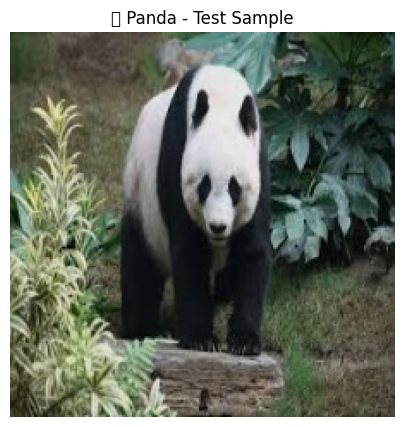

In [25]:
image = Image.open(image_path)

# Show it using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis("off")
plt.title("📷 Panda - Test Sample")
plt.show()

<Figure size 600x600 with 0 Axes>

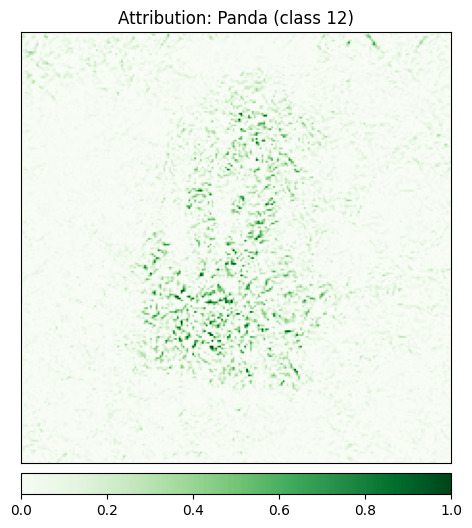

✅ Attribution saved to ../reports/explainability/panda_explained.png


In [28]:
# 🧠 Visualize and save
plot_attributions(
    attributions=attributions,
    original_image=input_tensor,
    target_label=f"{idx_to_class[predicted_class]} (class {predicted_class})",
    save_path="../reports/explainability/panda_explained.png"
)


### Looping Over all the classes

In [29]:
# 📂 Path to test data
test_dir = "../data/processed/test"


In [30]:
# 🏷️ Get class label mapping
dataset = datasets.ImageFolder(test_dir)
idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}


<Figure size 600x600 with 0 Axes>

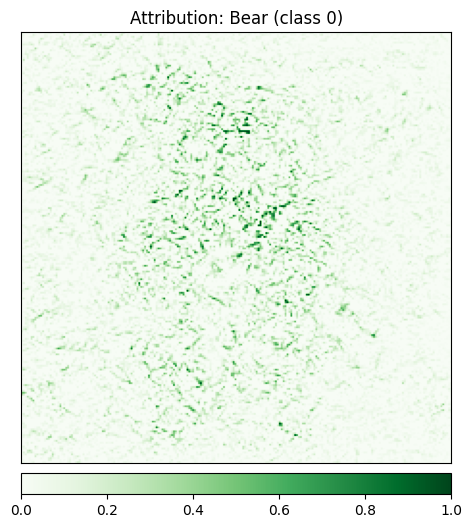

✅ Attribution saved to ../reports/explainability/bear_explained.png


<Figure size 600x600 with 0 Axes>

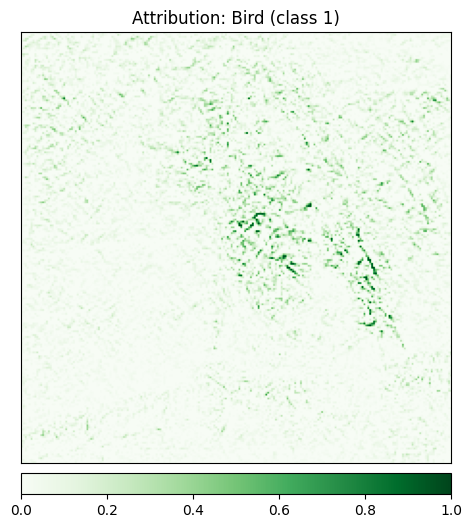

✅ Attribution saved to ../reports/explainability/bird_explained.png


<Figure size 600x600 with 0 Axes>

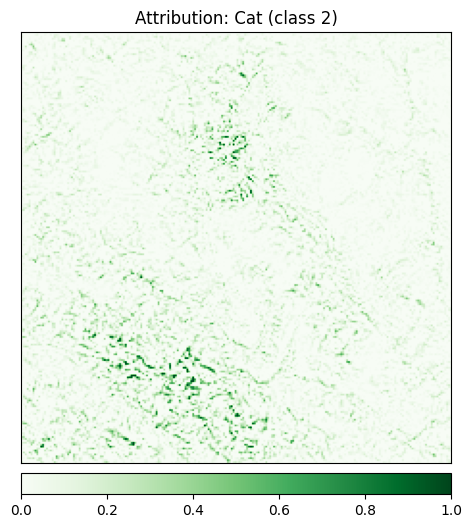

✅ Attribution saved to ../reports/explainability/cat_explained.png


<Figure size 600x600 with 0 Axes>

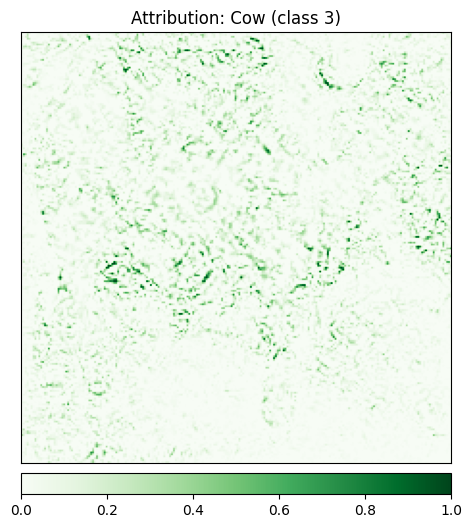

✅ Attribution saved to ../reports/explainability/cow_explained.png


<Figure size 600x600 with 0 Axes>

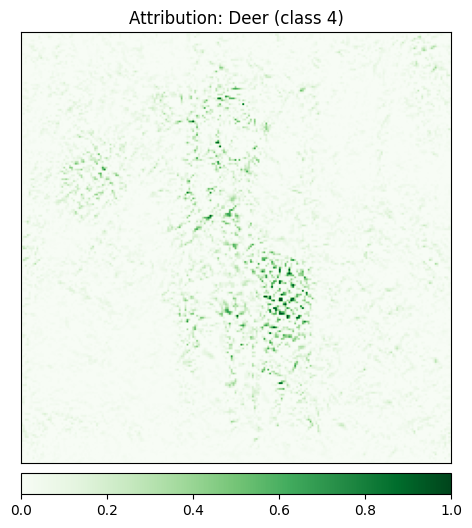

✅ Attribution saved to ../reports/explainability/deer_explained.png


<Figure size 600x600 with 0 Axes>

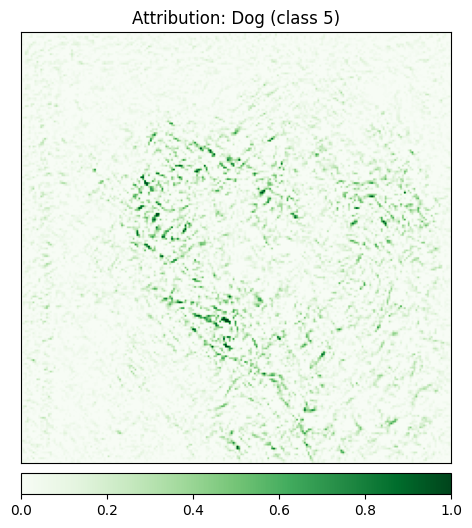

✅ Attribution saved to ../reports/explainability/dog_explained.png


<Figure size 600x600 with 0 Axes>

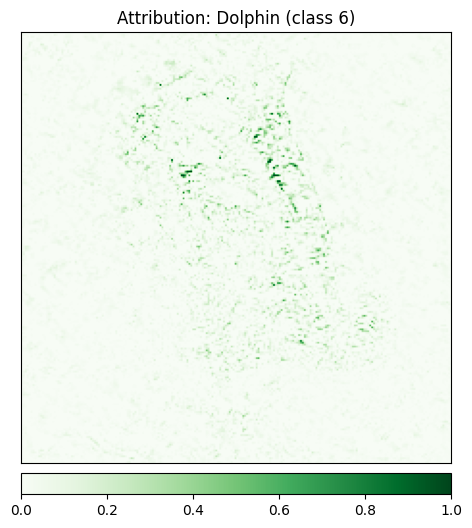

✅ Attribution saved to ../reports/explainability/dolphin_explained.png


<Figure size 600x600 with 0 Axes>

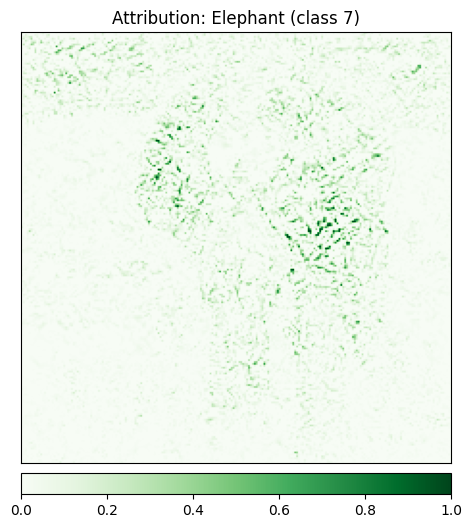

✅ Attribution saved to ../reports/explainability/elephant_explained.png


<Figure size 600x600 with 0 Axes>

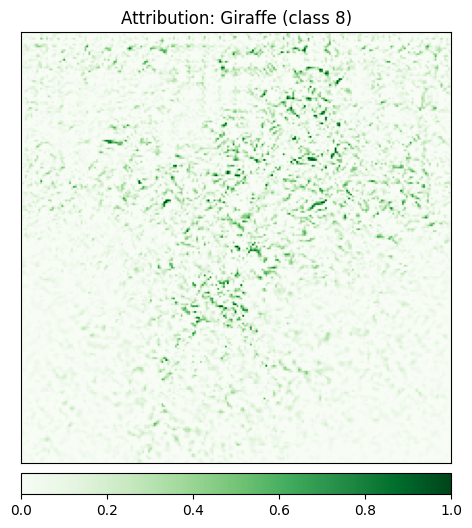

✅ Attribution saved to ../reports/explainability/giraffe_explained.png


<Figure size 600x600 with 0 Axes>

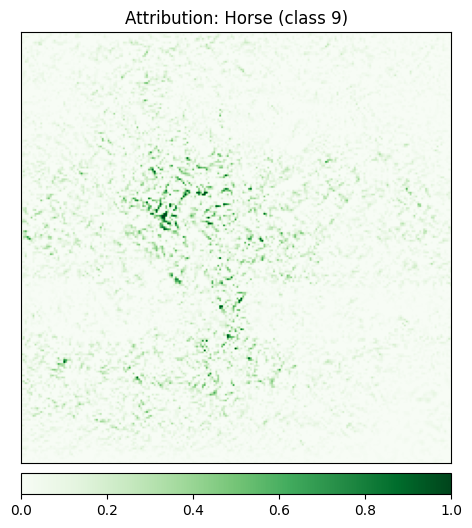

✅ Attribution saved to ../reports/explainability/horse_explained.png


<Figure size 600x600 with 0 Axes>

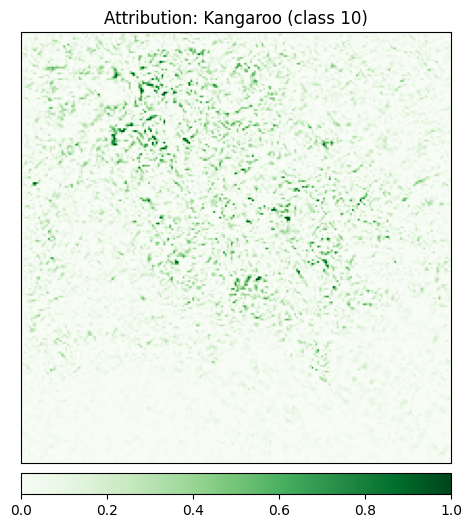

✅ Attribution saved to ../reports/explainability/kangaroo_explained.png


<Figure size 600x600 with 0 Axes>

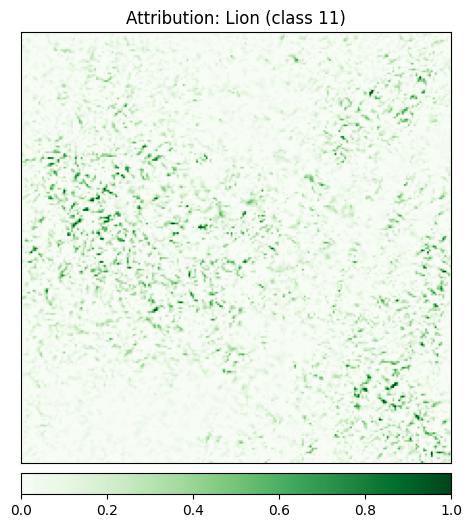

✅ Attribution saved to ../reports/explainability/lion_explained.png


<Figure size 600x600 with 0 Axes>

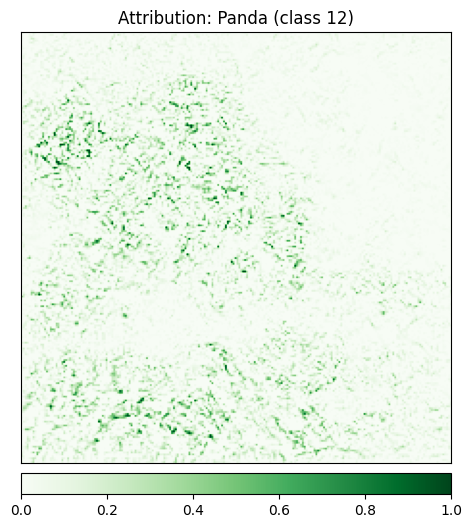

✅ Attribution saved to ../reports/explainability/panda_explained.png


<Figure size 600x600 with 0 Axes>

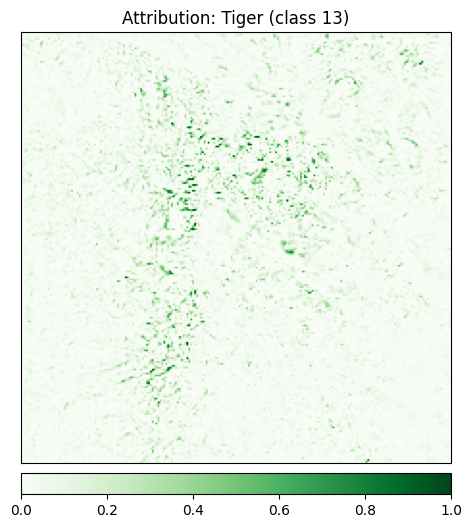

✅ Attribution saved to ../reports/explainability/tiger_explained.png


<Figure size 600x600 with 0 Axes>

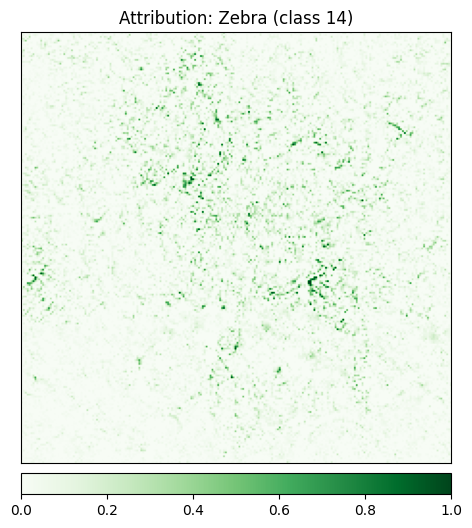

✅ Attribution saved to ../reports/explainability/zebra_explained.png


In [31]:
# 🔁 Loop through each class folder
for class_idx, class_name in idx_to_class.items():
    class_folder = os.path.join(test_dir, class_name)
    image_files = sorted(os.listdir(class_folder))
    
    if not image_files:
        print(f"⚠️ No images found in {class_folder}")
        continue
    
    image_path = os.path.join(class_folder, image_files[0])
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)

    # 🔮 Predict class
    with torch.no_grad():
        output = model(input_tensor)
        predicted_class = torch.argmax(output, dim=1).item()

    # 🎯 Generate attribution
    attributions = get_attributions(model, input_tensor, predicted_class)

    # 💾 Save with class name
    save_path = f"../reports/explainability/{class_name.lower()}_explained.png"
    plot_attributions(
        attributions=attributions,
        original_image=input_tensor,
        target_label=f"{idx_to_class[predicted_class]} (class {predicted_class})",
        save_path=save_path
    )


> import mlflow
> mlflow.log_artifact("../reports/explainability/panda_explained.png", artifact_path="explainability")
